In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def showimg(img):
	plt.imshow(img, cmap="gray"), plt.xticks([]), plt.yticks([])
	plt.show()

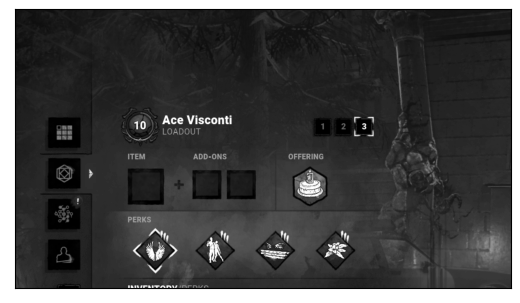

In [3]:
screen = cv2.cvtColor(cv2.imread("screen1.png"), cv2.COLOR_BGR2GRAY)
h,w = screen.shape
screen = screen[:h//2,:w//2]
showimg(screen)

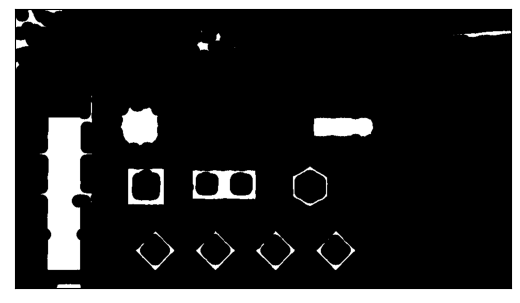

In [8]:
_,black = cv2.threshold(screen, 15, 255, cv2.THRESH_BINARY_INV)
black = cv2.morphologyEx(black, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25)))
showimg(black)

In [9]:
_,_,stats,_ = cv2.connectedComponentsWithStats(black, connectivity=8, ltype=cv2.CV_16U)

In [13]:
perkwidth = 77 # from calibration
loadoutPerks = [comp for comp in stats if 300 < comp[cv2.CC_STAT_AREA] < 2000 and abs(comp[cv2.CC_STAT_WIDTH] - perkwidth) < 10]
mediantop = np.median([comp[cv2.CC_STAT_TOP] for comp in loadoutPerks])
loadoutPerks = [perk for perk in loadoutPerks if abs(perk[cv2.CC_STAT_TOP] - mediantop) < 10]
loadoutPerks

[array([234, 431,  74,  74, 481], dtype=int32),
 array([351, 430,  74,  75, 489], dtype=int32),
 array([467, 430,  74,  75, 494], dtype=int32),
 array([584, 430,  74,  75, 527], dtype=int32)]